In [1]:
import json
import os
import pandas as pd
pd.set_option('plotting.backend', 'plotly')

In [2]:
def duration_in_hr(el):
    t_i = float(el['duration']['startTimestampMs'])
    t_f = float(el['duration']['endTimestampMs'])
    return (t_f - t_i) / (1000 * 60 * 60)

yearly_folders = [el 
           for el 
           in os.listdir() 
           if os.path.isdir(el)]


MONTH_MAP = {
    'JANUARY': 1,
    'FEBRUARY': 2,
    'MARCH': 3,
    'APRIL': 4,
    'MAY': 5,
    'JUNE': 6,
    'JULY': 7,
    'AUGUST': 8,
    'SEPTEMBER': 9,
    'OCTOBER': 10,
    'NOVEMBER': 11,
    'DECEMBER': 12
}

output = []

for year_folder in yearly_folders:
    year = str(year_folder)
    monthly_files = (el for el in os.listdir(year_folder)
                       if el[:4] == year)
    
    for month_file in monthly_files:
        path = f"{year_folder}/{month_file}"
        with open(path, 'r') as fid:
            d = json.load(fid)
        t = d['timelineObjects']
        
        segs = [el['activitySegment'] 
                for el in t 
                if 'activitySegment' in el]
        
        segs_2 = [el for el in segs
                  if 'activityType' in el
                  and 'distance' in el
                  and 'duration' in el]
        
        segs_3 = [seg 
                  for seg in segs_2 
                  if seg['activityType'] == 'CYCLING']
        
        
        for seg in segs_3:
            start_date = pd.to_datetime(seg['duration']['startTimestampMs'], unit='ms')
            distance_in_km = seg['distance'] / 1000
            time_in_hr = duration_in_hr(seg)
            output.append({'timestamp': start_date,
                           'distance_in_km': seg['distance'] / 1000,
                           'duration_in_hr': duration_in_hr(seg)})
        
#         distance_in_km = sum(el['distance'] for el in segs_3) / 1000
#         time_in_hr = sum(duration_in_hr(el) for el in segs_3)
        
#         month = month_file.split('_')[1].split('.')[0]
#         month_num = MONTH_MAP[month]
#         date = f"{year}-{month_num :02d}"
                
#         output.append({'date': date,
#                        'distance_in_km': distance_in_km,
#                        'time_in_hr': time_in_hr})

In [3]:
df = (pd.DataFrame(output)
        .sort_values('timestamp')
        .set_index('timestamp'))

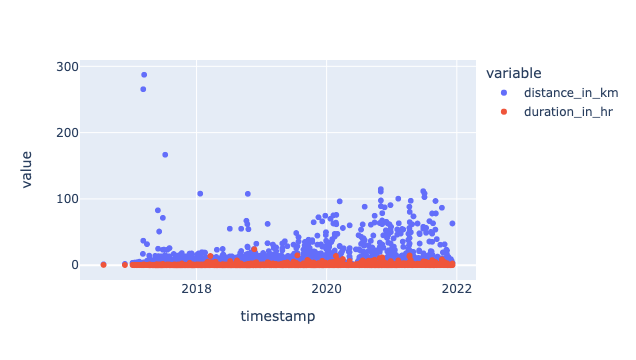

In [4]:
df.plot(kind='scatter')

In [5]:
df.resample('1y').sum()

,distance_in_km,duration_in_hr
timestamp,,
2016-12-31,3.354,0.863422
2017-12-31,4247.149,258.753034
2018-12-31,5705.366,523.915541
2019-12-31,7261.741,619.186113
2020-12-31,6886.199,559.229389
2021-12-31,5353.111,404.561958


In [6]:
df.resample('1y').mean()

,distance_in_km,duration_in_hr
timestamp,,
2016-12-31,1.677000,0.431711
2017-12-31,4.475394,0.272659
2018-12-31,4.368580,0.401160
2019-12-31,5.646766,0.481482
2020-12-31,9.001567,0.731019
2021-12-31,9.858400,0.745050


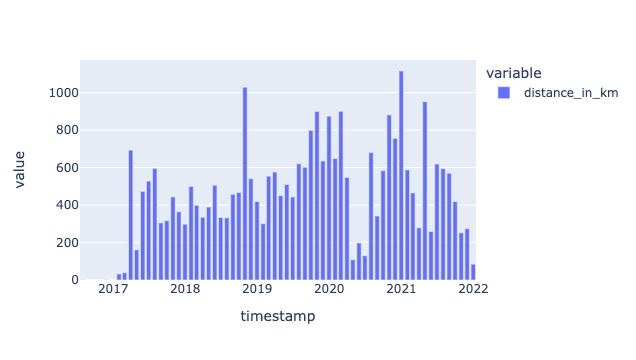

In [7]:
df.resample('1m').distance_in_km.sum().plot(kind='bar')

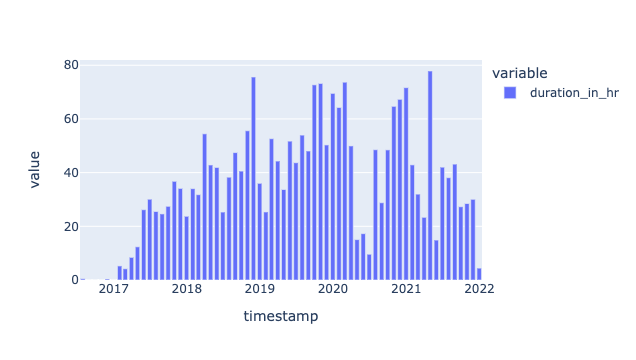

In [8]:
df.resample('1m').duration_in_hr.sum().plot(kind='bar')

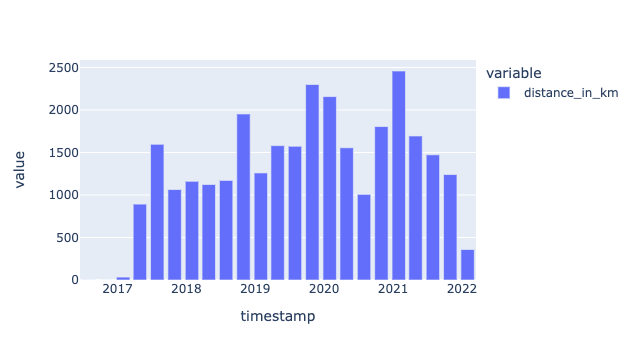

In [9]:
df.resample('3m').distance_in_km.sum().plot(kind='bar')

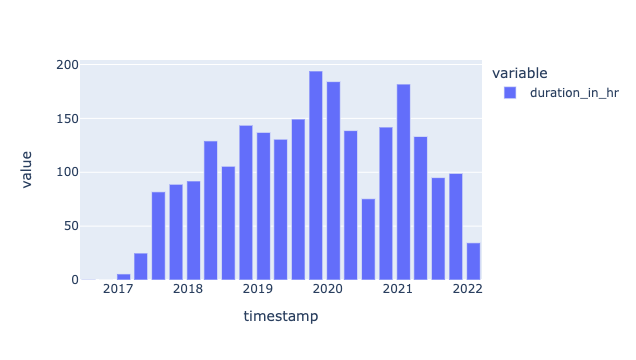

In [10]:
df.resample('3m').duration_in_hr.sum().plot(kind='bar')

In [11]:
df.to_csv('semantic-history-summary.csv.gz', compression='gzip')